In [1]:
import os
import glob
from tqdm import tqdm
import shutil
import random

In [2]:
all_splited_dataset = [
    '/tmp/combined_1m_9_domains/',    
]

In [3]:
all_non_splited_dataset = [
    '/tmp/final_randomize_vehicle_plate_150k/',
]

In [4]:
new_dataset_path = './combined_1m_10_domains/'
os.makedirs(new_dataset_path, exist_ok=True)
new_image_path = os.path.join(new_dataset_path, 'images')
os.makedirs(new_image_path, exist_ok=True)

In [5]:
new_tgt = []
new_src = []
for index, curr_dataset_path in enumerate(all_non_splited_dataset):
    print(curr_dataset_path)
    src_path = os.path.join(curr_dataset_path, 'src.txt')
    tgt_path = os.path.join(curr_dataset_path, 'tgt.txt')
    curr_src = open(src_path, 'r').read().split('\n')[:-1]
    curr_tgt = open(tgt_path, 'r').read().split('\n')[:-1]
    if 'empty' in curr_dataset_path:
        for src in tqdm(curr_src):
            current_image_path = os.path.join(curr_dataset_path, 'images', src)
            new_file_name = '{}_{}.{}'.format('.'.join(src.split('.')[:-1]),index,src.split('.')[-1])
            new_file_image_path = os.path.join(new_image_path, new_file_name)
            shutil.copyfile(current_image_path, new_file_image_path)
            new_src.append(new_file_name)
            new_tgt.append('')
    else:
        for src, tgt in tqdm(zip(curr_src, curr_tgt)):
            current_image_path = os.path.join(curr_dataset_path, 'images', src)
            new_file_name = '{}_{}.{}'.format('.'.join(src.split('.')[:-1]),index,src.split('.')[-1])
            new_file_image_path = os.path.join(new_image_path, new_file_name)
            shutil.copyfile(current_image_path, new_file_image_path)
            new_src.append(new_file_name)
            new_tgt.append(tgt)

1376it [00:00, 13758.41it/s]

/tmp/final_randomize_vehicle_plate_150k/


150000it [01:11, 2096.74it/s]


In [6]:
print(len(new_src))

150000


In [7]:
for index, curr_dataset_path in enumerate(all_splited_dataset):
    subsets = ['train', 'test', 'val']
    for subset in subsets:
        print('{} of {}'.format(subset, curr_dataset_path))
        src_path = os.path.join(curr_dataset_path, 'src-{}.txt'.format(subset))
        tgt_path = os.path.join(curr_dataset_path, 'tgt-{}.txt'.format(subset))
        curr_src = open(src_path, 'r').read().split('\n')[:-1]
        curr_tgt = open(tgt_path, 'r').read().split('\n')[:-1]
        for src, tgt in tqdm(zip(curr_src, curr_tgt)):
            current_image_path = os.path.join(curr_dataset_path, 'images', src).replace('/./','/')
            new_file_name = os.path.basename('{}_{}.{}'.format('.'.join(src.split('.')[:-1]),index,src.split('.')[-1]))
            new_file_image_path = os.path.join(new_image_path, new_file_name)
            shutil.copyfile(current_image_path, new_file_image_path)
            new_src.append(new_file_name)
            new_tgt.append(tgt)    

train of /tmp/combined_1m_9_domains/


1014344it [18:47, 899.49it/s] 
102it [00:00, 1013.10it/s]

test of /tmp/combined_1m_9_domains/


10000it [00:10, 969.58it/s]
103it [00:00, 1026.89it/s]

val of /tmp/combined_1m_9_domains/


20701it [00:26, 780.56it/s] 


In [8]:
print(len(new_src))
print(len(new_tgt))

1195045
1195045


In [9]:
X = new_src
y = new_tgt
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=min(0.1, 10000/len(X)), random_state=random.randint(1, 100))
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.02, random_state=random.randint(1, 100))

In [10]:
with open(os.path.join(new_dataset_path,'src-train.txt'), 'w') as f:
    for each in X_train:
        f.write('{}\n'.format(each))
with open(os.path.join(new_dataset_path,'tgt-train.txt'), 'w') as f:
    for each in y_train:
        f.write('{}\n'.format(each))
with open(os.path.join(new_dataset_path,'src-val.txt'), 'w') as f:
    for each in X_val:
        f.write('{}\n'.format(each))
with open(os.path.join(new_dataset_path,'tgt-val.txt'), 'w') as f:
    for each in y_val:
        f.write('{}\n'.format(each))
with open(os.path.join(new_dataset_path,'src-test.txt'), 'w') as f:
    for each in X_test:
        f.write('{}\n'.format(each))
with open(os.path.join(new_dataset_path,'tgt-test.txt'), 'w') as f:
    for each in y_test:
        f.write('{}\n'.format(each))

In [11]:
import cv2
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

def show_sample(img_path):
    img = cv2.imread(img_path)
    print(img.shape)
    plt.imshow(img)

cc_back_5818_2_2_3_0.png
2 0 3 6
(69, 93, 3)


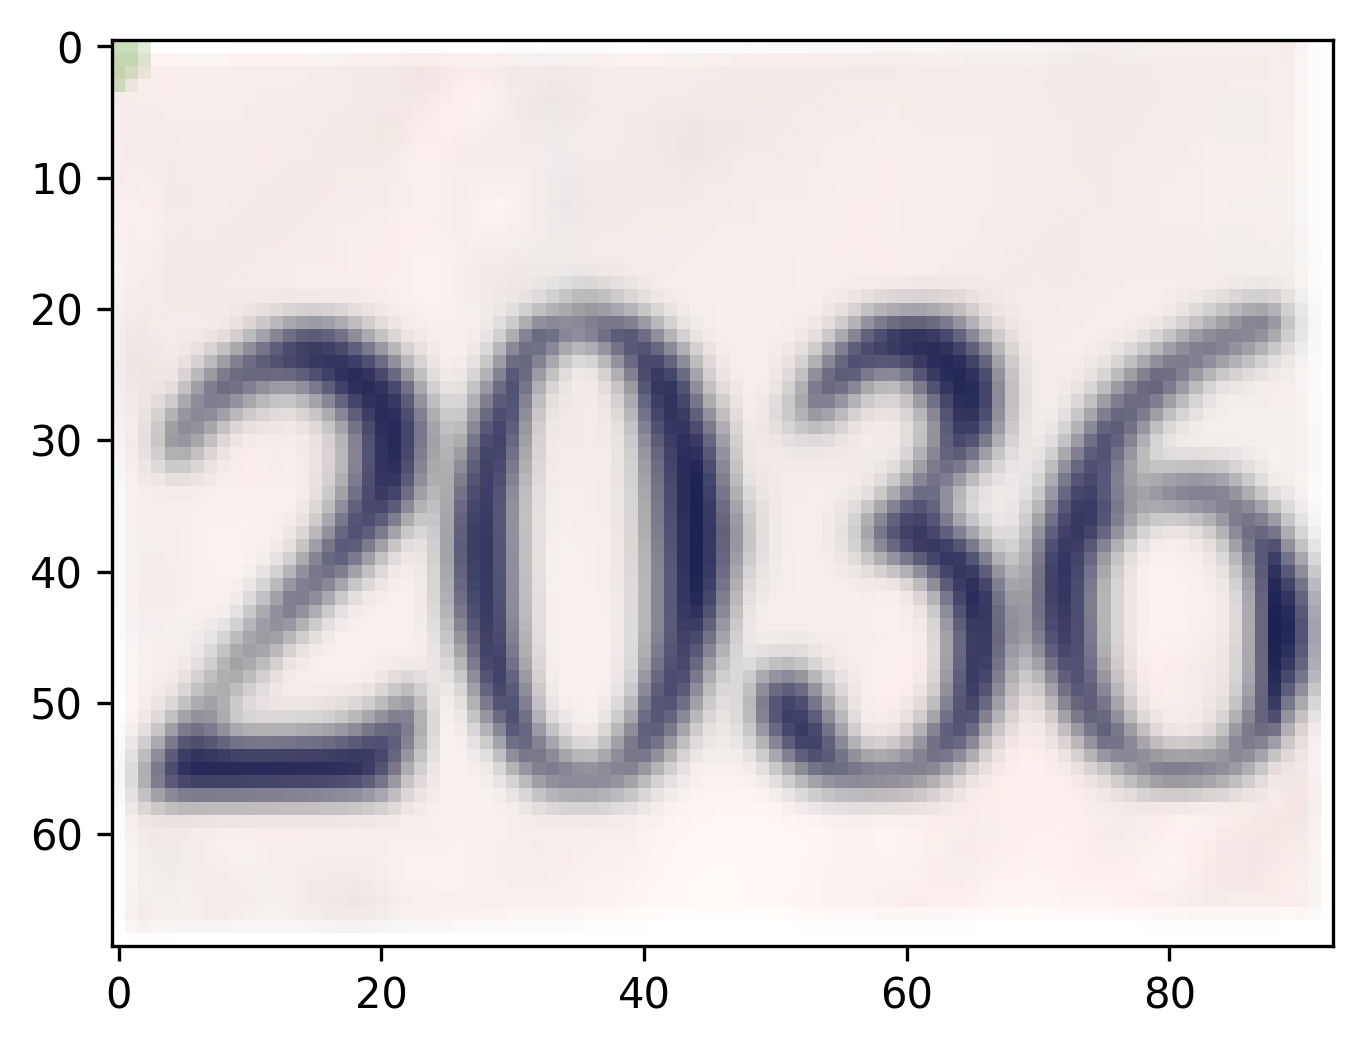

In [21]:
import random
index = random.randint(1, len(new_src))
img_path = os.path.join(new_image_path, new_src[index])
print(new_src[index])
print(new_tgt[index])
show_sample(img_path)